# Seasonal Flu Vaccine Predictive Model

* **Student name:** Caroline Surratt
* **Student pace:** Self-Paced
* **Scheduled project review date/time:** Tuesday, October 3rd at 10:00 AM
* **Instructor name:** Morgan Jones

# Business Understanding

# Data Understanding

# Importing Data and Exploratory Analysis

In the cell below, I will import the features and the target variable using Pandas.

The features are stored in the file titled "training_features", and the target variable is stored in the file titled "training_labels". Both files are located in the data folder of this repository.

In [1]:
import pandas as pd

X = pd.read_csv('training_features', index_col='respondent_id')
y = pd.read_csv('training_labels', index_col='respondent_id')['seasonal_vaccine']

In [2]:
print(X.shape)

(26707, 35)


Again, as noted in the Data Understanding section, this dataset contains 26,707 entries, with each entry containing information about 35 features. These features will be discussed in more detail below.

### Train-Test Split

Before any any exploratory analysis or model creation, I will split the data into a training set and a test set. This must occur before any data cleaning or fitting of the model in order to prevent any data leakage and to ensure that the model will be appropriate on future unseen data.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Exploratory Analysis: Features

In [4]:
X_train

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
25194,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,1.0,1.0,NaN,NaN
14006,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,Married,NaN,Employed,lzgpxyit,"MSA, Not Principle City",2.0,1.0,fcxhlnwr,oijqvulv
11285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,kbazzjca,"MSA, Principle City",0.0,1.0,wlfvacwt,hfxkjkmi
2900,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Own,Employed,mlyzmhmf,"MSA, Not Principle City",0.0,0.0,mcubkhph,ukymxvdu
19083,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,bhuqouqj,"MSA, Not Principle City",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Principle City",0.0,0.0,NaN,NaN
5390,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Unemployed,mlyzmhmf,"MSA, Principle City",0.0,0.0,NaN,NaN
860,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,Non-MSA,1.0,0.0,atmlpfrs,xqwwgdyp


In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20030 entries, 25194 to 23654
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 19963 non-null  float64
 1   h1n1_knowledge               19943 non-null  float64
 2   behavioral_antiviral_meds    19974 non-null  float64
 3   behavioral_avoidance         19873 non-null  float64
 4   behavioral_face_mask         20016 non-null  float64
 5   behavioral_wash_hands        19994 non-null  float64
 6   behavioral_large_gatherings  19960 non-null  float64
 7   behavioral_outside_home      19972 non-null  float64
 8   behavioral_touch_face        19932 non-null  float64
 9   doctor_recc_h1n1             18395 non-null  float64
 10  doctor_recc_seasonal         18395 non-null  float64
 11  chronic_med_condition        19313 non-null  float64
 12  child_under_6_months         19425 non-null  float64
 13  health_worker    

In [6]:
print("Number of numeric columns: {}".format(len(X_train.select_dtypes(exclude="object").columns)))
print("Number of categorical columns: {}".format(len(X_train.select_dtypes(include="object").columns)))

Number of numeric columns: 23
Number of categorical columns: 12


 23 of these features are numerical and 12 are categorical. As can be seen in the above DataFrame, some of the categorical values are descriptive (i.e. the values in the "rent_or_own" column are "Rent" and "Own") while other categorical values are random strings (i.e. the values in the "employment_industry" column.
 
There are several features that have a significant number of missing values. These values will need to be imputed in order to build a model that can make predictions on data that may also include missing values. The specific strategy for imputing will be discussed in the preprocessing section below.

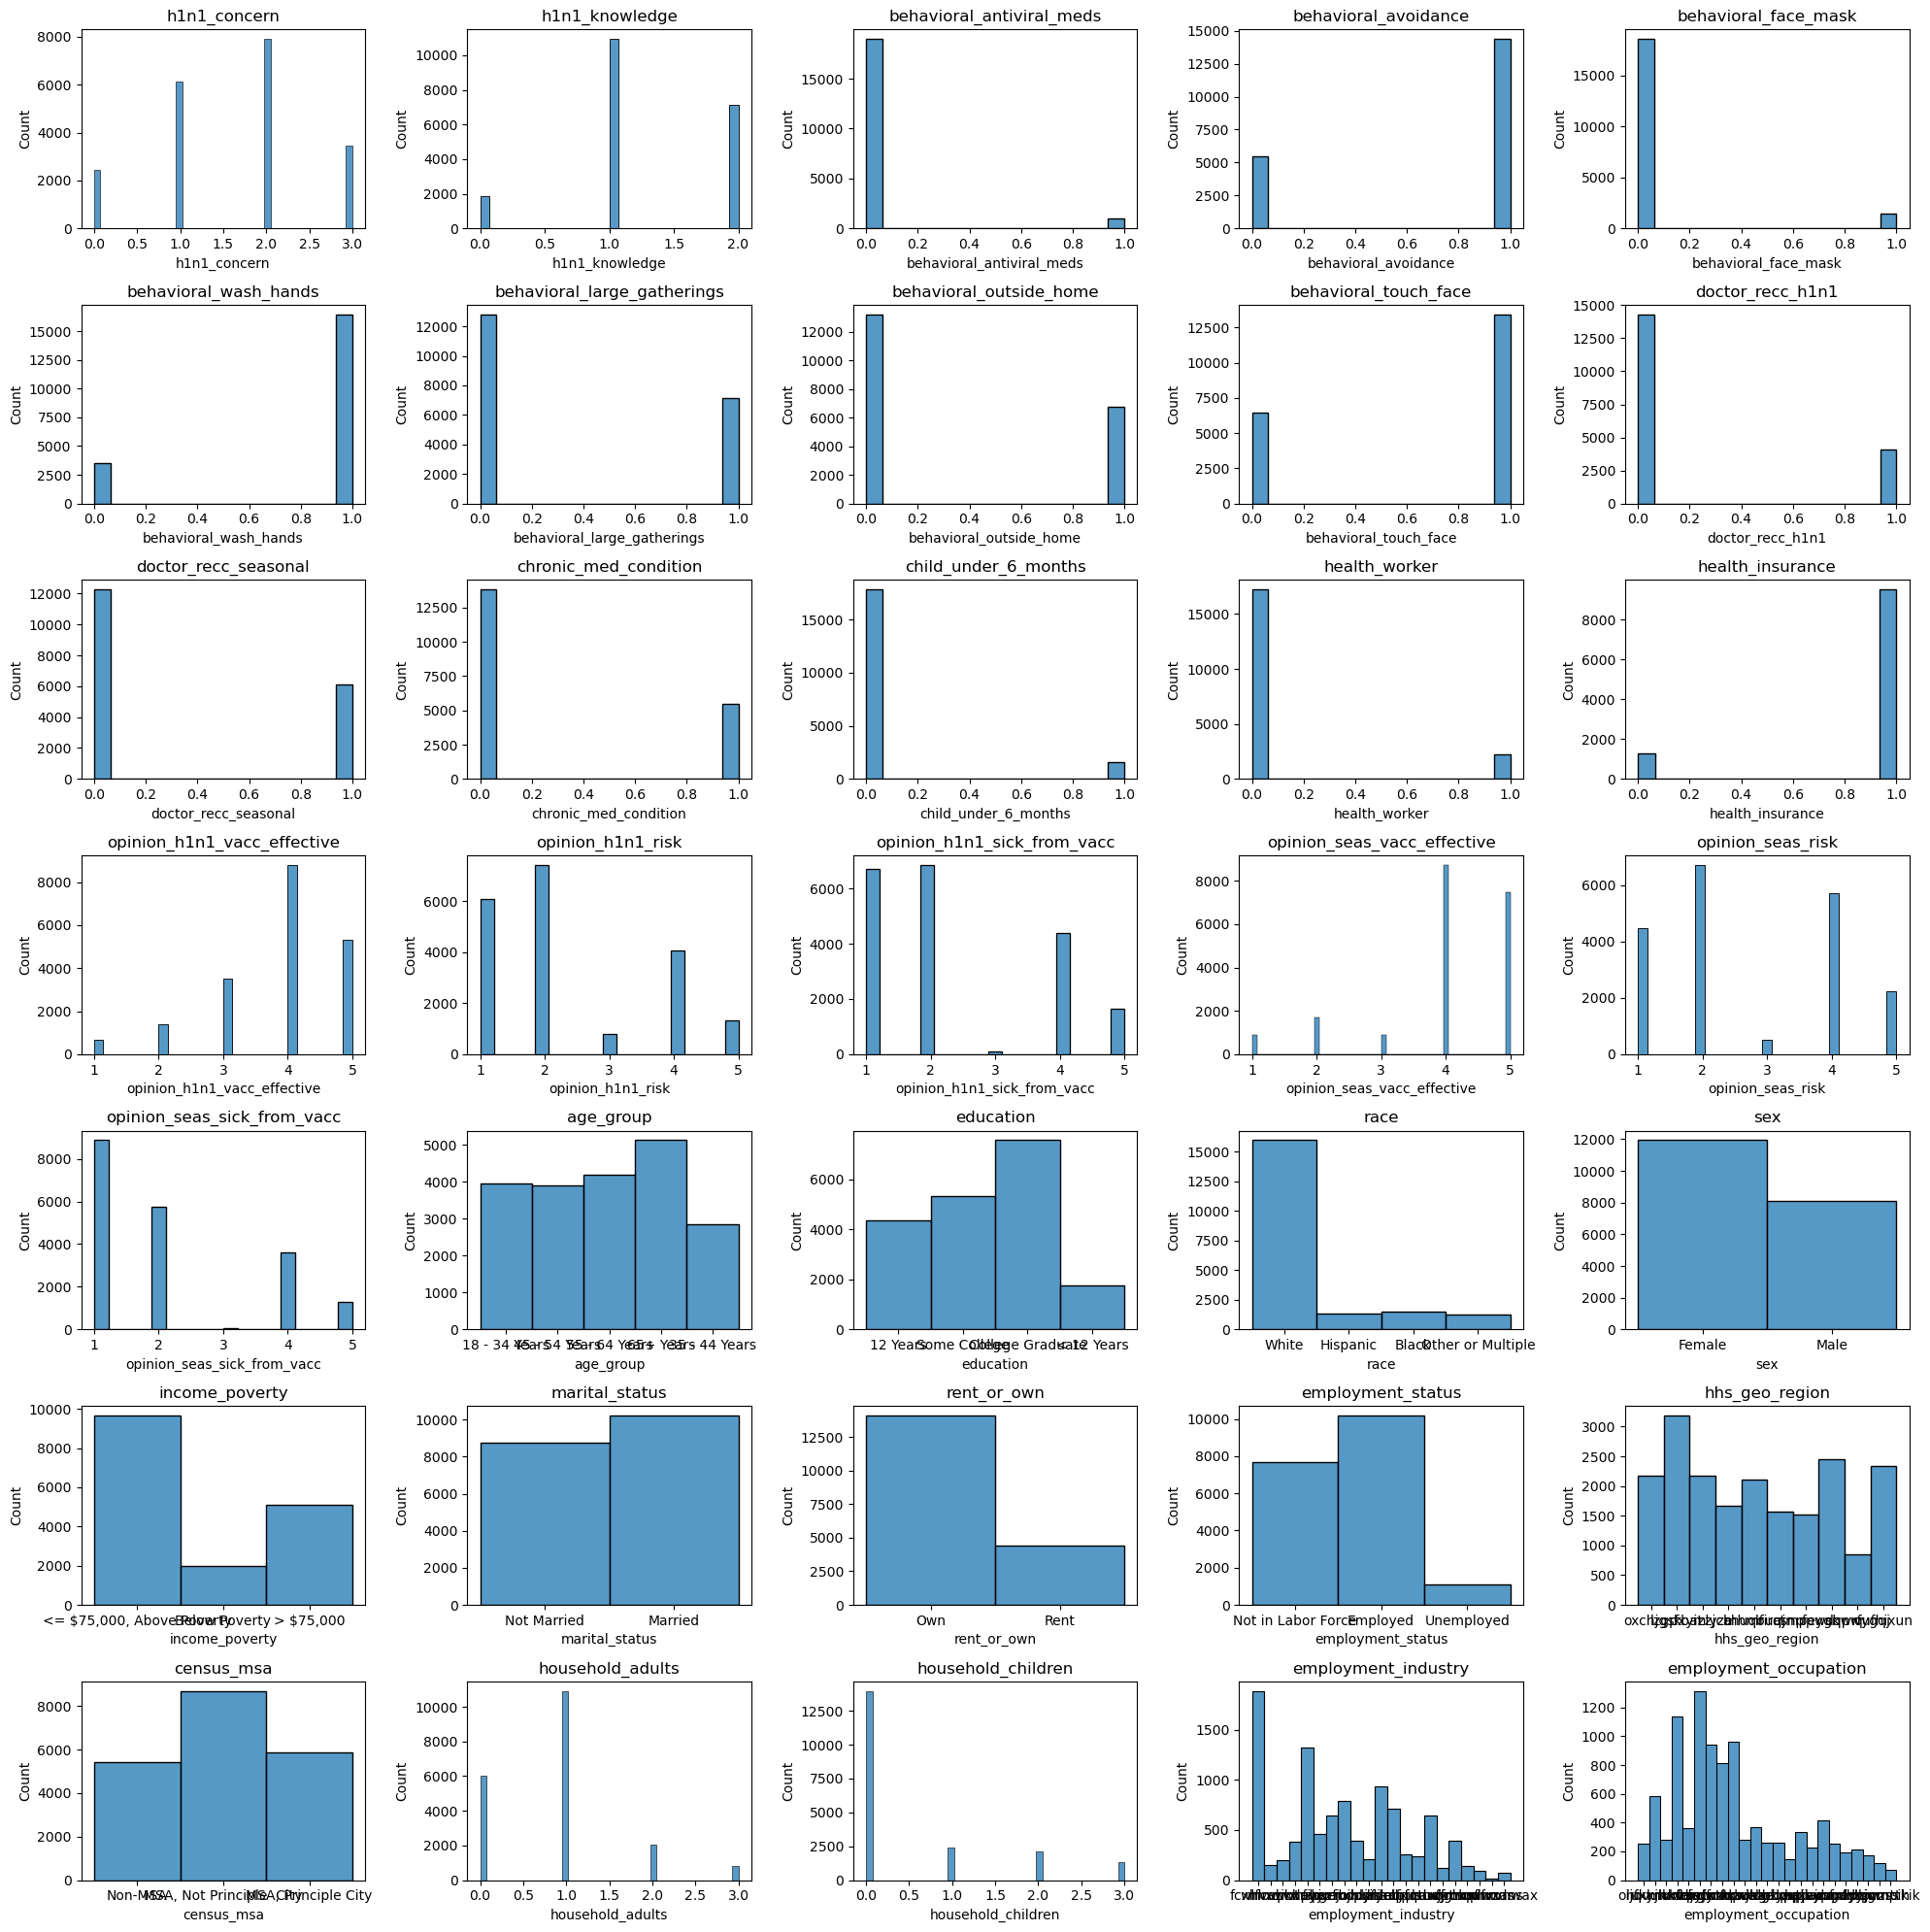

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(20,20))

for i, column in enumerate(X_train):
    sns.histplot(X_train[column], ax=axes[i//5, i%5]).set_title(column)
    
plt.tight_layout();

The above visualizations provide a rough sense of the distributions of these features. The features vary widely in their distributuions: some are highly skewed (i.e. "behavioral_antiviral_meds" and "opinion_seas_sick_from_vacc"), while others are more uniformly distributed (i.e. "marital_status").

Many (though not all) of the numeric features are binary, with a 0 representing "no" and a 1 representing "yes". Other numeric features utilize rating scales (with 0 being the null response and larger values being increasingly alternative responses) and counts (i.e. number of people in household). Although these columns are encoded as float64 values, the actual values themselves are integers. However, not all of the numeric columns are on the same scale: while many only contain values of 0 or 1, several include values from 0-2, 0-3, or even 0-5. Therefore, these numbers will need to be scaled in order to accurately fit to certain classifier models.

Like many of the numeric features, some of the categorical features are also binary (i.e. "rent_or_own"). Other categorical features have more than two values (for example, "education"). It is also noteworthy that some of the categorical features are actually binned numeric features (i.e. "age_group"). These features will be discussed in greater detail when considering encoding during preprocessing.

It is worth acknowledging that some of the categorical distributions shown here are difficult to interpret because of the axis labels. However, these labels are actually meaningless because they values have been encoded as random-character strings. Therefore, no meaning can be gained from the labels. Still, we are able to see that for some of these features (i.e. "employment_industry") there are values that are significantly more common than others, while for other features (i.e. "hhs_geo_region"), the values have a more uniform (although not perfectly uniform) distribution.

### Exploratory Analysis: Target

In [8]:
y_train.value_counts(normalize=True)

seasonal_vaccine
0    0.531103
1    0.468897
Name: proportion, dtype: float64

The target variable is a binary value that indicates whether an individual did (1) or did not (0) receive their seasonal flu vaccine. In this dataset, approximately 53% of individuals _did_ get vaccinated, and the remaining 47% _did not_ get vaccinated.

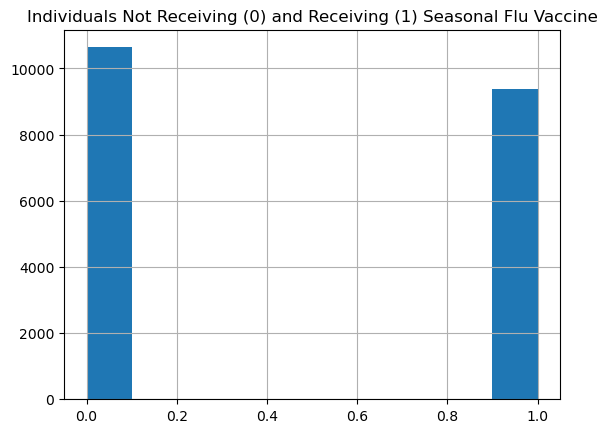

In [9]:
y_train.hist().set_title("Individuals Not Receiving (0) and Receiving (1) Seasonal Flu Vaccine");

The distribution of individuals who did and did not receive the seasonal flu vaccine is fairly balanced. Therefore, no undersampling/oversampling techniques will be necessary.

# Dealing with Missing Data

As noted above, there are several features with significant amounts of data missing. In the cell below, I will display the list of columns with the number of missing values per column, sorted in descending order.

In [10]:
X_train.isna().sum().sort_values(ascending=False)

employment_occupation          10074
employment_industry             9974
health_insurance                9233
income_poverty                  3269
doctor_recc_h1n1                1635
doctor_recc_seasonal            1635
rent_or_own                     1512
employment_status               1081
education                       1040
marital_status                  1038
chronic_med_condition            717
child_under_6_months             605
health_worker                    597
opinion_seas_sick_from_vacc      407
opinion_seas_risk                387
opinion_seas_vacc_effective      349
opinion_h1n1_sick_from_vacc      301
opinion_h1n1_vacc_effective      299
opinion_h1n1_risk                292
household_children               188
household_adults                 188
behavioral_avoidance             157
behavioral_touch_face             98
h1n1_knowledge                    87
behavioral_large_gatherings       70
h1n1_concern                      67
behavioral_outside_home           58
b

It is possible that human error (for example, skipping a question) led to some of these missing values. However, a closer examination of the survey illuminates that this is likely not the case. 

Consider the number of unique values that were entered in the "employment_occupation" column. Again, because these columns were encoded as random-character strings, the values themselves will not be useful to us.

In [11]:
print("Number of unique values in 'employment_occupation':", len(X_train['employment_occupation'].value_counts()))
print()
print("Most common values in 'employment_occupation':", X_train['employment_occupation'].value_counts().head(2))
print()
print("Least common values in 'employment_occupation':", X_train['employment_occupation'].value_counts().tail(2))

Number of unique values in 'employment_occupation': 23

Most common values in 'employment_occupation': employment_occupation
xtkaffoo    1316
mxkfnird    1139
Name: count, dtype: int64

Least common values in 'employment_occupation': employment_occupation
dcjcmpih    117
pvmttkik     71
Name: count, dtype: int64


Despite not knowing that the specific values in these columns actually **_mean_**, we can infer from the number of unique values in each column that the categorizations are **not exhaustive**. Unless these categories were highly generic, it is unlikely that the 10,056 indivdiuals who responded to this question only fell into 23 unique occupations.

What is more likely is that many of the remaining 9,974 individuals fell into other occupations, but these groups were relatively insignificant in size and therefore were not encoded as random strings. As shown above, the least commonly encoded string still occurs 71 times. It is unlikely that the true least commonly occuring occupation occured 71 times. Instead, there was likely a cutoff for the number of occurrences in order for a value to be represented. In this case, occupations that were insignificant in size were not encoded as random strings; instead, they were not encoded at all, leading to the missing values.

_**In this case (and in the case of the employment_industry column, which also encodes categories as random character strings), the missing values should not be imputed as the most commonly occuring value or  using the given distribution of occupations. Instead, a separate class such as "Other" should be used.**_

However, questions with binary responses require additional consideration. Consider the health_insurance column:

In [12]:
X_train["health_insurance"].value_counts()

health_insurance
1.0    9514
0.0    1283
Name: count, dtype: int64

The [data description](https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/)  indicates that a value of 0 represents "No" and a value of 1 represents "Yes". A value of "Other" is nonsensical here - as each individual either does or does not have health insurance.

However, [the questionnaire](./survey.pdf) used for this survey shows that there are two other possible reponses for binary questions: "Don't Know" and "Refused".

For some columns, "Refused" may be more likely than "Don't Know". For example, it is unlikely that a person does not know his or her income or health insurance status. It is more likely that the individual did not want to provide that infomration because they deemed it sensitive.

For other columns, "Don't Know" may be more likely than "Refused". For example, a person may truly not know whether or not their doctor recommended the H1N1 vaccine.

The specific interpretation of the missing values (i.e. "Other" vs. "Don't Know" vs. "Refused") is not of particular importance at this stage: what is important is that these responses are not be treated as normal responses and imputed with the mean/median/mode responses. Instead, these responses should be treated as their own category, as the lack of information could in fact tell us more information. 

For example, perhaps individuals that did not respond to the health insurance question are less likely to have health insurance. Perhaps individuals that did not respond to the income question have significantly higher (or lower) than average incomes.

In lieu of making specific assumptions about what these missing values mean, I will impute the missing values as a separate category and allow the model to determine the impact of that response.

# Preprocessing Training Data

## Imputing Missing Values

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20030 entries, 25194 to 23654
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 19963 non-null  float64
 1   h1n1_knowledge               19943 non-null  float64
 2   behavioral_antiviral_meds    19974 non-null  float64
 3   behavioral_avoidance         19873 non-null  float64
 4   behavioral_face_mask         20016 non-null  float64
 5   behavioral_wash_hands        19994 non-null  float64
 6   behavioral_large_gatherings  19960 non-null  float64
 7   behavioral_outside_home      19972 non-null  float64
 8   behavioral_touch_face        19932 non-null  float64
 9   doctor_recc_h1n1             18395 non-null  float64
 10  doctor_recc_seasonal         18395 non-null  float64
 11  chronic_med_condition        19313 non-null  float64
 12  child_under_6_months         19425 non-null  float64
 13  health_worker    

In [14]:
X_train_string = X_train.astype(str)
X_train_string.isna().sum().sum()

0

## One Hot Encoding

In [15]:
from sklearn.preprocessing import OneHotEncoder

# instantiates OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# fits and transforms OneHotEncoder object on the categorical training data
X_train_ohe = ohe.fit_transform(X_train_string)

# re-formats the array as a DataFrame
X_train_ohe = pd.DataFrame(X_train_ohe, 
                           columns=ohe.get_feature_names_out(X_train_string.columns),
                           index=X_train_string.index)

X_train_ohe

,h1n1_concern_0.0,h1n1_concern_1.0,h1n1_concern_2.0,h1n1_concern_3.0,h1n1_concern_nan,h1n1_knowledge_0.0,h1n1_knowledge_1.0,h1n1_knowledge_2.0,h1n1_knowledge_nan,behavioral_antiviral_meds_0.0,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
25194,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14006,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11285,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2900,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19083,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Preprocessing Testing Data

## Imputing Missing Values

In [16]:
X_test.shape

(6677, 35)

In [17]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6677 entries, 15772 to 16392
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 6652 non-null   float64
 1   h1n1_knowledge               6648 non-null   float64
 2   behavioral_antiviral_meds    6662 non-null   float64
 3   behavioral_avoidance         6626 non-null   float64
 4   behavioral_face_mask         6672 non-null   float64
 5   behavioral_wash_hands        6671 non-null   float64
 6   behavioral_large_gatherings  6660 non-null   float64
 7   behavioral_outside_home      6653 non-null   float64
 8   behavioral_touch_face        6647 non-null   float64
 9   doctor_recc_h1n1             6152 non-null   float64
 10  doctor_recc_seasonal         6152 non-null   float64
 11  chronic_med_condition        6423 non-null   float64
 12  child_under_6_months         6462 non-null   float64
 13  health_worker     

In [18]:
X_test_string = X_test.astype(str)
X_test_string.isna().sum().sum()

0

## One Hot Encoding

In [19]:
# Transforms the testing data using the fitted ohe object
X_test_ohe = ohe.transform(X_test_string)

# Reformats the testing data as a DataFrame for visual inspection
X_test_ohe = pd.DataFrame(X_test_ohe,
                          columns = ohe.get_feature_names_out(X_test_string.columns),
                          index = X_test_string.index)

X_test_ohe

,h1n1_concern_0.0,h1n1_concern_1.0,h1n1_concern_2.0,h1n1_concern_3.0,h1n1_concern_nan,h1n1_knowledge_0.0,h1n1_knowledge_1.0,h1n1_knowledge_2.0,h1n1_knowledge_nan,behavioral_antiviral_meds_0.0,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
15772,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9407,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16515,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23353,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10008,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25990,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14302,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3817,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Baseline Models

In [23]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

logreg.fit(X_train_ohe, y_train)

print("Training score: ", logreg.score(X_train_ohe, y_train))
print("Testing score: ", logreg.score(X_test_ohe, y_test))

Training score:  0.7866699950074888
Testing score:  0.7895761569567171


In [24]:
from sklearn.tree import DecisionTreeClassifier

baseline_tree = DecisionTreeClassifier(random_state=42)

baseline_tree.fit(X_train_ohe, y_train)

print("Training score: ", baseline_tree.score(X_train_ohe, y_train))
print("Testing score: ", baseline_tree.score(X_test_ohe, y_test))

Training score:  1.0
Testing score:  0.6883330837202336


In [ ]:
from sklearn.neighbors import K

In [ ]:
from sklearn.metrics import accuracy_score, classification_report


## Previous Model

# Fitting the Decision Tree

First, I will fit a decision tree classifier object on the training data. For the baseline model, I will not adjust any of the hyperparameters. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

baseline_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)

baseline_tree.fit(X_train, y_train)

# Model Evaluation

## Performance on Training Data

Now, I will use the baseline model to predict the target variable for both the training data and the testing data.

In [ ]:
y_hat_train = baseline_tree.predict(X_train)

In [ ]:
import numpy as np

train_residuals = np.abs(y_train - y_hat_train)

print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_hat_train, y_train)

## Performance on Testing Data

### Predict Testing Targets

In [ ]:
y_hat_test = baseline_tree.predict(X_test)

In [ ]:
test_residuals = np.abs(y_test - y_hat_test)

In [ ]:
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
confusion_matrix(y_test, y_hat_test)

In [ ]:
accuracy_score(y_test, y_hat_test)

### Still need to adjust hyperparameters (plan to use GridSearchCV)

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 7, 10, 15, 20],
    'min_samples_split': [5, 10, 20, 30, 50],
    'min_samples_leaf': [5, 10, 20, 30, 50]
}

gs_tree = GridSearchCV(clf, param_grid, cv=3)
gs_tree.fit(X_train, y_train)

gs_tree.best_params_

In [ ]:
tuned_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50, min_samples_split=5)
tuned_tree.fit(X_train, y_train)

In [ ]:
y_hat_test = tuned_tree.predict(X_test)

In [ ]:
accuracy_score(y_test, y_hat_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, solver='liblinear')

In [ ]:
logreg.fit(X_train, y_train)

In [ ]:
y_hat_test = logreg.predict(X_test)

In [ ]:
accuracy_score(y_test, y_hat_test)

# Using LabelEncoder instead of OneHotEncoder

In [ ]:
# Old code - ignore

In [ ]:
gini_tree = DecisionTreeClassifier(random_state=42)
gini_tree.fit(X_train, y_train)

In [ ]:
# baseline Logistic Regression model in StatsModels
import statsmodels.api as sm

X_train_for_statsmodels = sm.add_constant(X_train)

model = sm.Logit(y_train, X_train_for_statsmodels)
result = model.fit()

result.summary()

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, 
                            C=1e12, 
                            solver='liblinear')
logreg.fit(X_train, y_train)

In [ ]:
y_test_hat_logreg = logreg.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_test_hat_logreg)

In [ ]:
accuracy_score(y_test, y_test_hat_logreg)

In [ ]:
logreg2 = LogisticRegression(fit_intercept=False,
                            C=1e12,
                            solver='liblinear')

logreg2.fit(X_train, y_train)

In [ ]:
y_test_hat_logreg2 = logreg2.predict(X_test)

In [ ]:
accuracy_score(y_test, y_test_hat_logreg2)

### Dropping irrelevant columns from decision tree

In [ ]:
X = pd.read_csv('training_features', index_col='respondent_id')
y = pd.read_csv('training_labels', index_col='respondent_id')['seasonal_vaccine']

In [ ]:
X.columns

In [ ]:
columns_to_drop = ['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 
                   'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 
                   'opinion_h1n1_sick_from_vacc']
                   

In [ ]:
X.drop(columns_to_drop, axis=1, inplace=True)

## New model after dropped columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# selects only numerical columns
X_train_numerical = X_train.select_dtypes(exclude=object)

# selects only categorical columns
X_train_categorical = X_train.select_dtypes(include=object)

# instantiates SimpleImputer that will fill missing values with the column mean
numerical_imputer = SimpleImputer(strategy='mean')

# fits the SimpleImputer object on the numerical training data and formats as DataFrame
X_train_numerical = pd.DataFrame(numerical_imputer.fit_transform(X_train_numerical),
                                columns = X_train_numerical.columns,
                                index = X_train_numerical.index)


# categorical
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train_categorical = pd.DataFrame(categorical_imputer.fit_transform(X_train_categorical),
                                  columns = X_train_categorical.columns,
                                  index = X_train_categorical.index)

In [ ]:
# instantiated OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# fit and transform ohe on the categorical training data
X_train_categorical_ohe = ohe.fit_transform(X_train_categorical)

# re-formatted the array as a DataFrame (need column titles and index to concatenate)
X_train_categorical_ohe = pd.DataFrame(X_train_categorical_ohe, 
                                       columns=ohe.get_feature_names_out(X_train_categorical.columns),
                                       index=X_train_categorical.index)

X_train_categorical_ohe


In [ ]:
X_train = pd.concat([X_train_numerical, X_train_categorical_ohe], axis=1)

In [ ]:
entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
entropy_tree.fit(X_train, y_train)

gini_tree = DecisionTreeClassifier(random_state=42)
gini_tree.fit(X_train, y_train)

In [ ]:
# selects only numerical columns
X_test_numerical = X_test.select_dtypes(exclude=object)

# selects only categorical columns
X_test_categorical = X_test.select_dtypes(include=object)

# fills missing values in X_test_numerical with the column mean of training data
X_test_numerical = pd.DataFrame(numerical_imputer.transform(X_test_numerical),
                               columns = X_test_numerical.columns,
                               index = X_test_numerical.index)

# fills missing values in X_test_categorical with the column mode of training data
X_test_categorical = pd.DataFrame(categorical_imputer.transform(X_test_categorical),
                                 columns = X_test_categorical.columns,
                                 index = X_test_categorical.index)

# one-hot encodes testing data using the ohe object fit on the training data
X_test_categorical_ohe = ohe.transform(X_test_categorical)

# reformats the array as a DataFrame
X_test_categorical_ohe = pd.DataFrame(X_test_categorical_ohe,
                                      columns = ohe.get_feature_names_out(X_test_categorical.columns),
                                      index = X_test_categorical.index)

X_test = pd.concat([X_test_numerical, X_test_categorical_ohe], axis = 1)

y_test_hat_entropy = entropy_tree.predict(X_test)
print("Entropy Test Accuracy: ", accuracy_score(y_test, y_test_hat_entropy))

y_test_hat_gini = gini_tree.predict(X_test)
print("Gini Test Accuracy: ", accuracy_score(y_test, y_test_hat_gini))

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [ ]:
# need to run in terminal: conda install -c conda-forge statsmodels